Text(0, 0.5, 'euclidean distance')

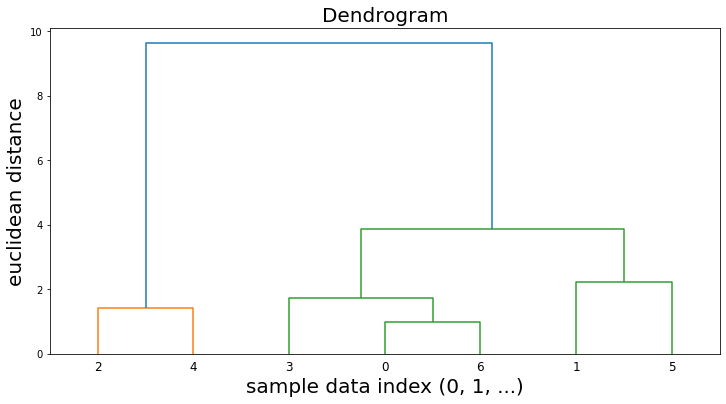

In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from matplotlib import pyplot as plt

data_ex = np.array([[3, 4], [1, 5], [7, 9],[5, 4],
                             [6, 8], [2, 3],[4, 4]])
plt.figure(figsize=(12,6))
cluster=linkage(data_ex ,method='ward')

dendrogram(cluster)
plt.title('Dendrogram', size=20)
plt.xlabel('sample data index (0, 1, ...)', size=20)
plt.ylabel('euclidean distance', size=20)

In [2]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
data_ex = np.array([[3, 4], [1, 5], [7, 9],[5, 4],
                             [6, 8], [2, 3],[4, 4]])
cluster = AgglomerativeClustering(n_clusters=2,
                         affinity='euclidean', linkage='ward')
cluster.fit_predict(data_ex)

array([0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [3]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
data_ex = np.array([[3, 4], [1, 5], [7, 9],[5, 4],
                             [6, 8], [2, 3],[4, 4]])
cluster = AgglomerativeClustering(n_clusters=3,
                         affinity='euclidean', linkage='ward')
cluster.fit_predict(data_ex)

array([2, 0, 1, 2, 1, 0, 2], dtype=int64)

In [4]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2, 2], [1, 4, 5], [1, 0, 2], [10, 2, 7],
                   [10, 4, 5], [10, 0, 6]])
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(f'cluster: {kmeans.labels_}')
print(f'중심점: {kmeans.cluster_centers_}')
print(f'응집도: {kmeans.inertia_}')
kmeans.score(X)

cluster: [0 0 0 1 1 1]
중심점: [[ 1.  2.  3.]
 [10.  2.  6.]]
응집도: 24.0


-24.0

In [5]:
import pandas as pd 
df=pd.read_csv('d:/데이터/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot of Age')

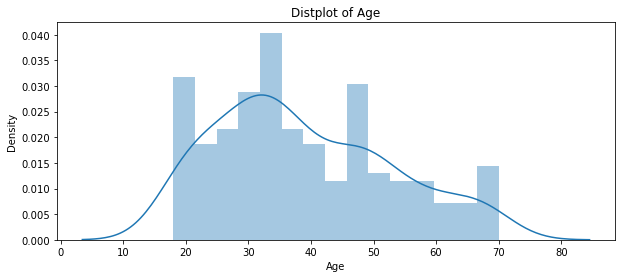

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1, figsize = (10, 4))
sns.distplot(df['Age'] , bins = 15)
plt.title('Distplot of Age')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot of Annual Income (k$)')

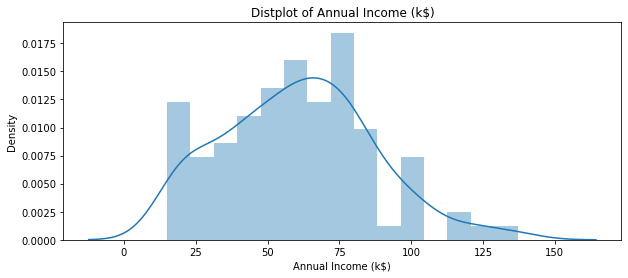

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1, figsize = (10, 4))
sns.distplot(df['Annual Income (k$)'] , bins = 15)
plt.title('Distplot of Annual Income (k$)')

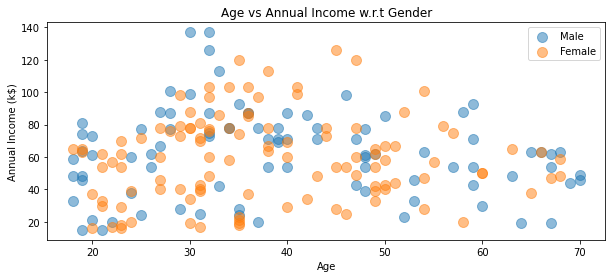

In [12]:
plt.figure(1, figsize = (10, 4))
for gender in ['Male' , 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)',
                data=df[df['Gender']==gender],
                s=100, alpha=0.5, label = gender)
plt.xlabel('Age'); plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()

Text(0, 0.5, 'Euclidean Distances')

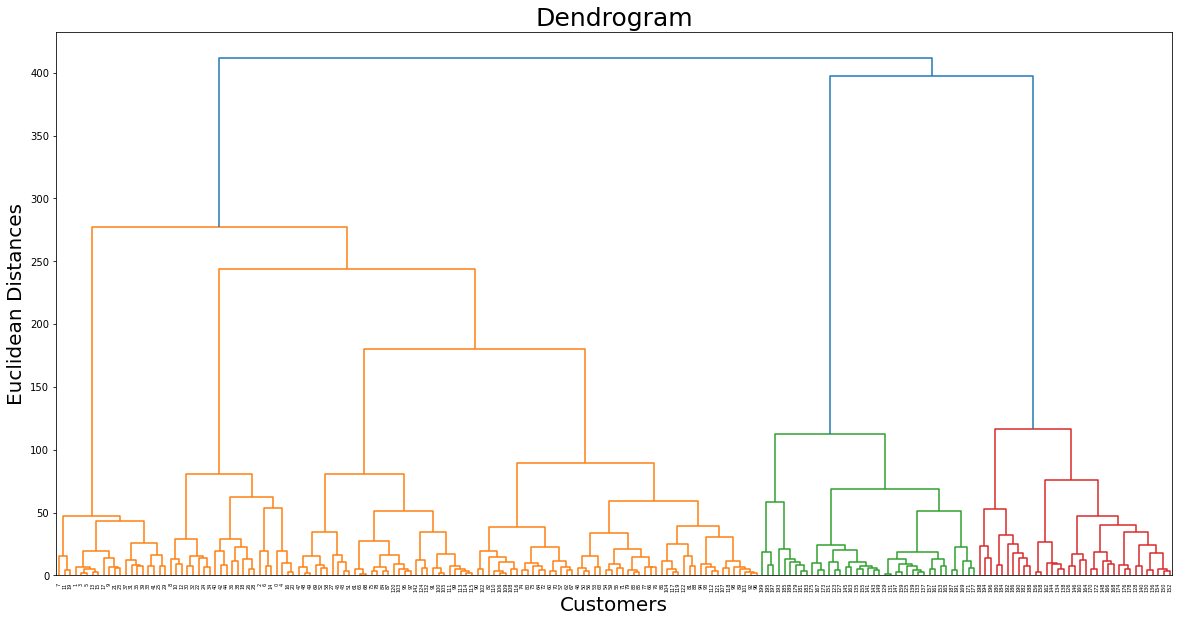

In [14]:
import pandas as pd
df=pd.read_csv('d:/데이터/Mall_Customers.csv')
data= df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
cluster=linkage(data, method='ward')
dendrogram = dendrogram(cluster)
plt.title('Dendrogram',size=25)
plt.xlabel('Customers', size=20)
plt.ylabel('Euclidean Distances', size=20)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


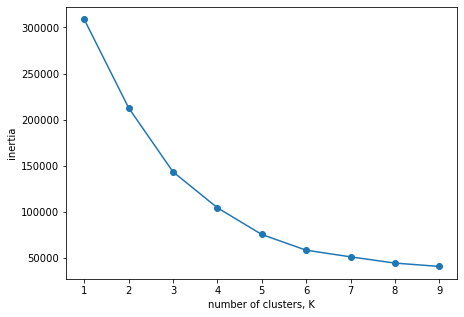

In [15]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기 : inertia(군집 내 거리제곱합의 합) value (적정 군집수)

data= df[['Age' , 'Annual Income (k$)','Spending Score (1-100)']].iloc[: , :].values
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data)
    inertias.append(model.inertia_)

plt.figure(figsize=(7, 5))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, K')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [17]:
import numpy as np
from sklearn.cluster import KMeans
data= df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
# 군집회에 고려할 속성을 선택하여 dataframe(data) 생성
algorithm = KMeans(n_clusters = 5)  # 군집 수 K=5
algorithm.fit(data)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_
df['label'] =  labels   # 군집결과 (0, 1, … , 4)를 별도의 컬럼(label)에 저장
print(f'* 중심점: {centroids}')  # 군집의 중심점 확인
df.head()

* 중심점: [[24.96       28.04       77.        ]
 [32.69230769 86.53846154 82.12820513]
 [43.72727273 55.48051948 49.32467532]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

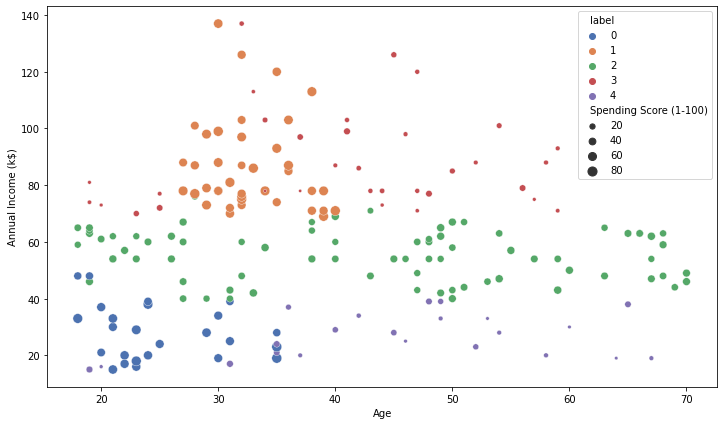

In [18]:
import seaborn as sns
plt.figure(figsize = (12 , 7) )
sns.scatterplot(x='Age', y='Annual Income (k$)',
                hue='label', size='Spending Score (1-100)',
                data=df, palette='deep', sizes=(10,100))